In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import mdtraj as mdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


import sys
import subprocess
sys.path.append("../../analysis")
from rg import gmx_gyrate
from add_sidechains import add_sidechains

plt.rcParams["figure.dpi"] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams[
    "text.latex.preamble"
] = r"\usepackage[version=4]{mhchem} \usepackage[separate-uncertainty=true,multi-part-units=single]{siunitx}"
sns.set_theme()

palette = sns.color_palette()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
ens_path = "/home/gzappavigna/lmp_conf_builder/MeV_NT_ens"
# cmd = rf'find {ens_path}/ensemble_200_* -regex "^.*/[0-9]+a_132\.pdb$"'
cmd = rf'find {ens_path}/ensemble_200_1 -regex "^.*/[0-9]+a_132\.pdb$"'
res = subprocess.run(cmd, shell=True, capture_output=True, text=True)

trajs = [mdt.load(pdb) for pdb in res.stdout.splitlines()]
# trajs = add_sidechains([pdb for pdb in res.stdout.splitlines()])

ens_rgs = np.concatenate([mdt.compute_rg(traj) for traj in trajs])
# traj = add_sidechains(pdbs)



In [6]:
# np.save("ens_rgs.npy", ens_rgs)
ens_rgs = np.load("ens_rgs.npy")

## Coarse grained

In [ ]:
pdb = "/home/gzappavigna/lmp_conf_builder/runs/cg.pdb"
xtc = "/home/gzappavigna/lmp_conf_builder/runs/6921a_132/ref/traj.xtc"

rg_df = gmx_gyrate(xtc, pdb)

t_ns = rg_df.index / 1000
sim_rg = rg_df.Rg.to_numpy()


27


In [ ]:
plt.hist(exp_rgs, 15, density=True)
plt.hist(sim_rg, 500, density=True)

In [ ]:
plt.plot(t_ns, sim_rg)

## All-atom, single trajectory

In [4]:
# TIP4P

xtc = "/media/gzappavigna/333D62AD699A6ACF/GRE052309/data/gzappavigna/lmp_conf_builder/gmx/amber/step5_production_nojump.xtc"
pdb = "/media/gzappavigna/333D62AD699A6ACF/GRE052309/data/gzappavigna/lmp_conf_builder/gmx/amber/step5_production_nojump.gro"

tip4p_rg_df = gmx_gyrate(xtc, pdb)

t_tip4p = tip4p_rg_df.index / 1000
tip4p_sim_rg = tip4p_rg_df.Rg.to_numpy()


In [5]:
# OPC (ref and CMAP)

ref_xtc = "/home/gzappavigna/traj/20241007_ff99sb-ildn-opc/md_nojump.xtc"
ref_pdb = "/home/gzappavigna/traj/20241007_ff99sb-ildn-opc/md_nojump.pdb"

ref_rg_df = gmx_gyrate(ref_xtc, ref_pdb)

t_ref = ref_rg_df.index / 1000
ref_sim_rg = ref_rg_df.Rg.to_numpy()


cmap_xtc = "/home/gzappavigna/traj/20241015_ff99sb-ildn-opc_cmap/md_nojump.xtc"
cmap_pdb = "/home/gzappavigna/traj/20241015_ff99sb-ildn-opc_cmap/md_nojump.pdb"

cmap_rg_df = gmx_gyrate(cmap_xtc, cmap_pdb)

t_cmap = cmap_rg_df.index / 1000
cmap_sim_rg = cmap_rg_df.Rg.to_numpy()



In [6]:
q = tip4p_sim_rg.min()
m = (ref_sim_rg[0] - q) / (tip4p_sim_rg[0] - q)

tip4p_sim_rg =  (tip4p_sim_rg - q) *m + q

In [11]:
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Text(0, 0.5, '\\textrm{Density}')

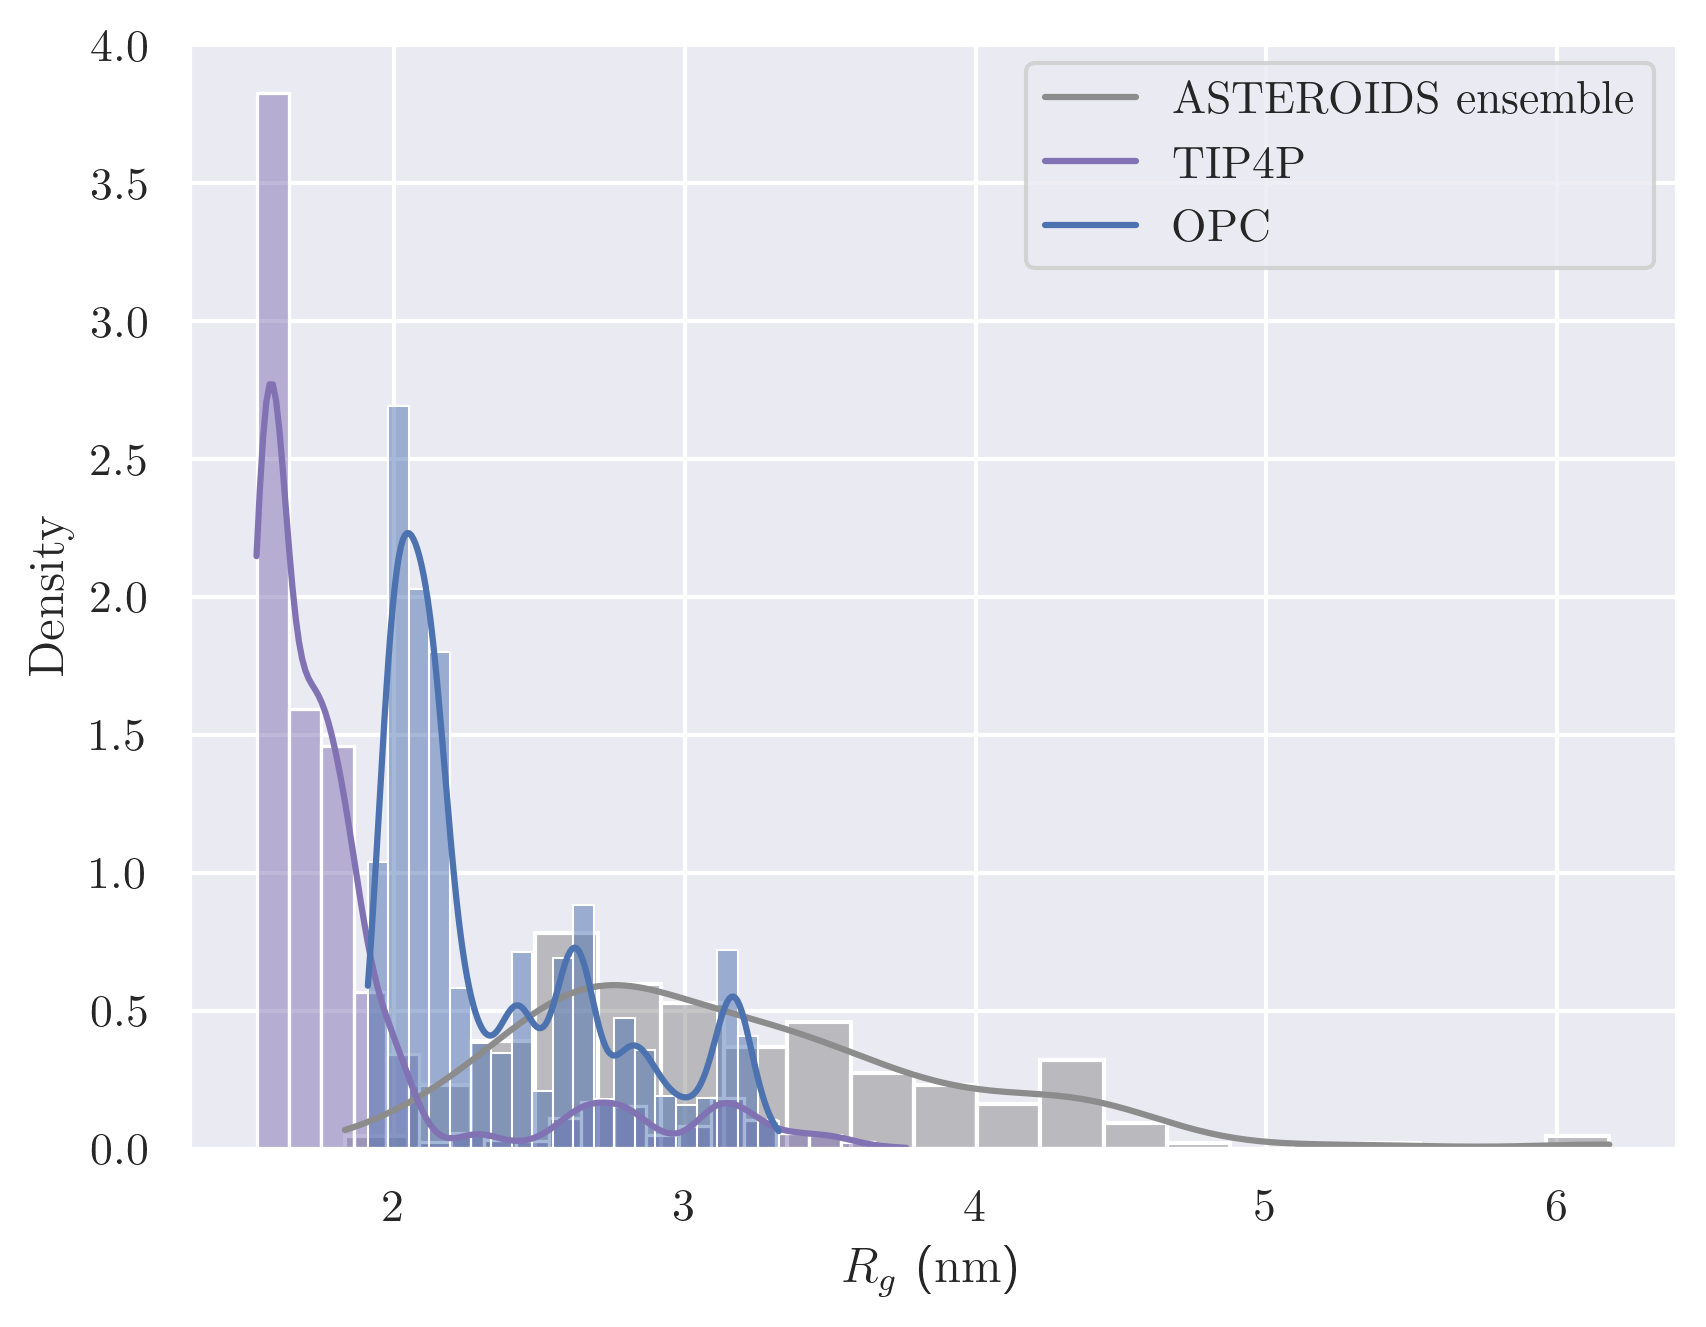

In [22]:
palette = sns.color_palette()

sns.histplot(
    ens_rgs,
    kde=True,
    stat="density",
    bins=20,
    color=palette[-3]
)

sns.histplot(
     tip4p_sim_rg,
    kde=True,
    stat="density",
    bins=20,
    kde_kws=dict(bw_adjust=2.0),
    color=palette[4]
)

tmp = sns.histplot(
     ref_sim_rg,
    kde=True,
    stat="density",
    bins=20,
    kde_kws=dict(bw_adjust=2.0),
    color=palette[0]
)


plt.legend([r"\textrm{ASTEROIDS ensemble}", r"\textrm{TIP4P}", r"\textrm{OPC}"])
plt.xlabel(r"$R_g$ (\unit{\nm})")
plt.ylabel(r"\textrm{Density}")


In [23]:
tmp.

<Axes: xlabel='$R_g$ (\\unit{\\nm})', ylabel='\\textrm{Density}'>

In [ ]:
plt.ylabel(r"$R_g$ (\unit{\nm})")
plt.xlabel(r"$t$ (\unit{\ns})")
plt.plot(t_tip4p, tip4p_sim_rg, label= r"\textrm{TIP4P}")

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ax.hlines(y=ens_rgs.mean(), xmin=xmin, xmax=xmax, colors=palette[-3], ls='--', lw=2, alpha=0.5, label=r"\textrm{ASTEROIDS $\left\langle R_g \right\rangle$}")
plt.legend()

## All-atom OPC, single trajectory

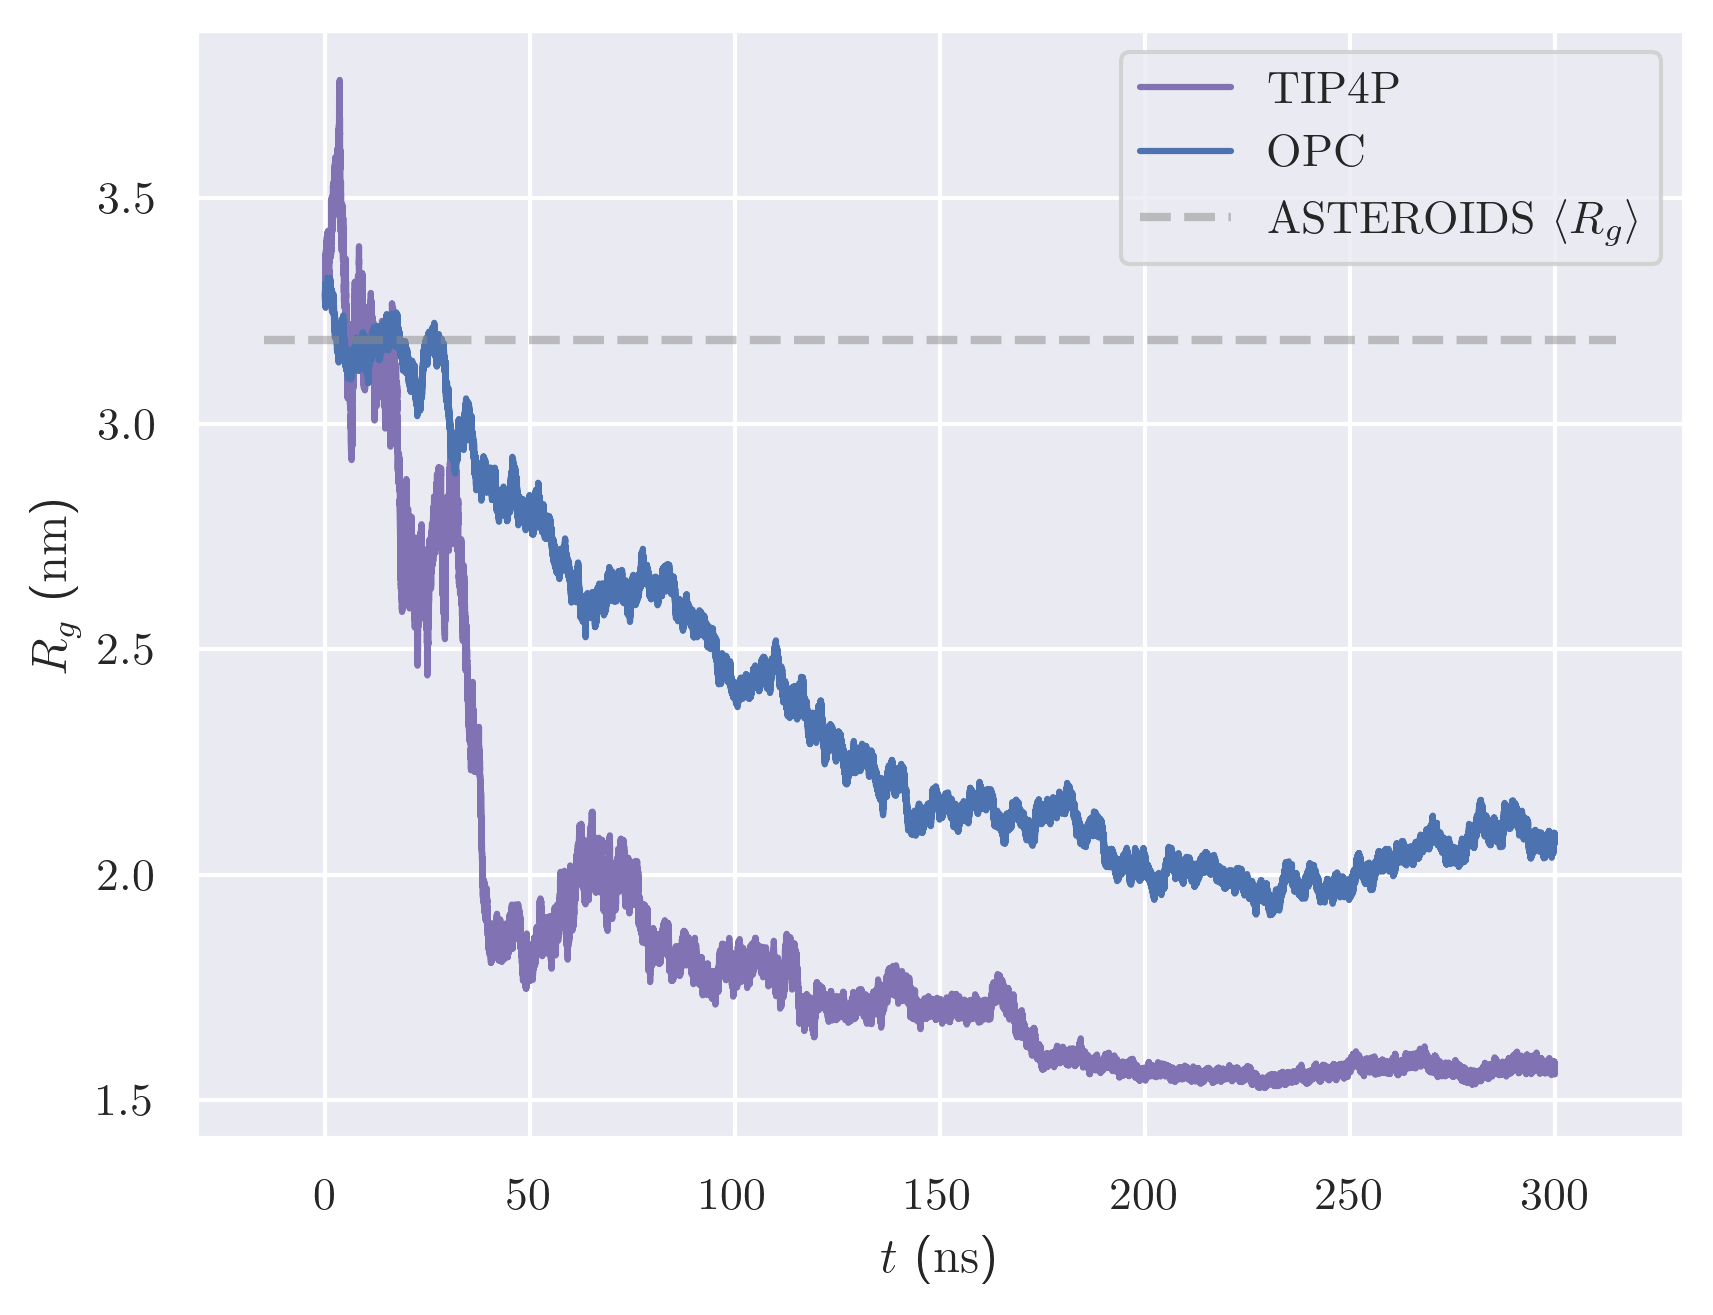

In [20]:
palette = sns.color_palette()
plt.plot(t_tip4p, tip4p_sim_rg, label= r"\textrm{TIP4P}", color=palette[4])
plt.plot(t_ref, ref_sim_rg, label= r"\textrm{OPC}", color=palette[0])
plt.ylabel(r"$R_g$ (\unit{\nm})")
plt.xlabel(r"$t$ (\unit{\ns})")
# plt.legend()
ax = plt.gca()
xmin, xmax = ax.get_xlim()
ax.hlines(y=ens_rgs.mean(), xmin=xmin, xmax=xmax, colors=palette[-3], ls='--', lw=2, alpha=0.5, label=r"\textrm{ASTEROIDS $\left\langle R_g \right\rangle$}")

plt.legend()

# sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5), frameon=False)


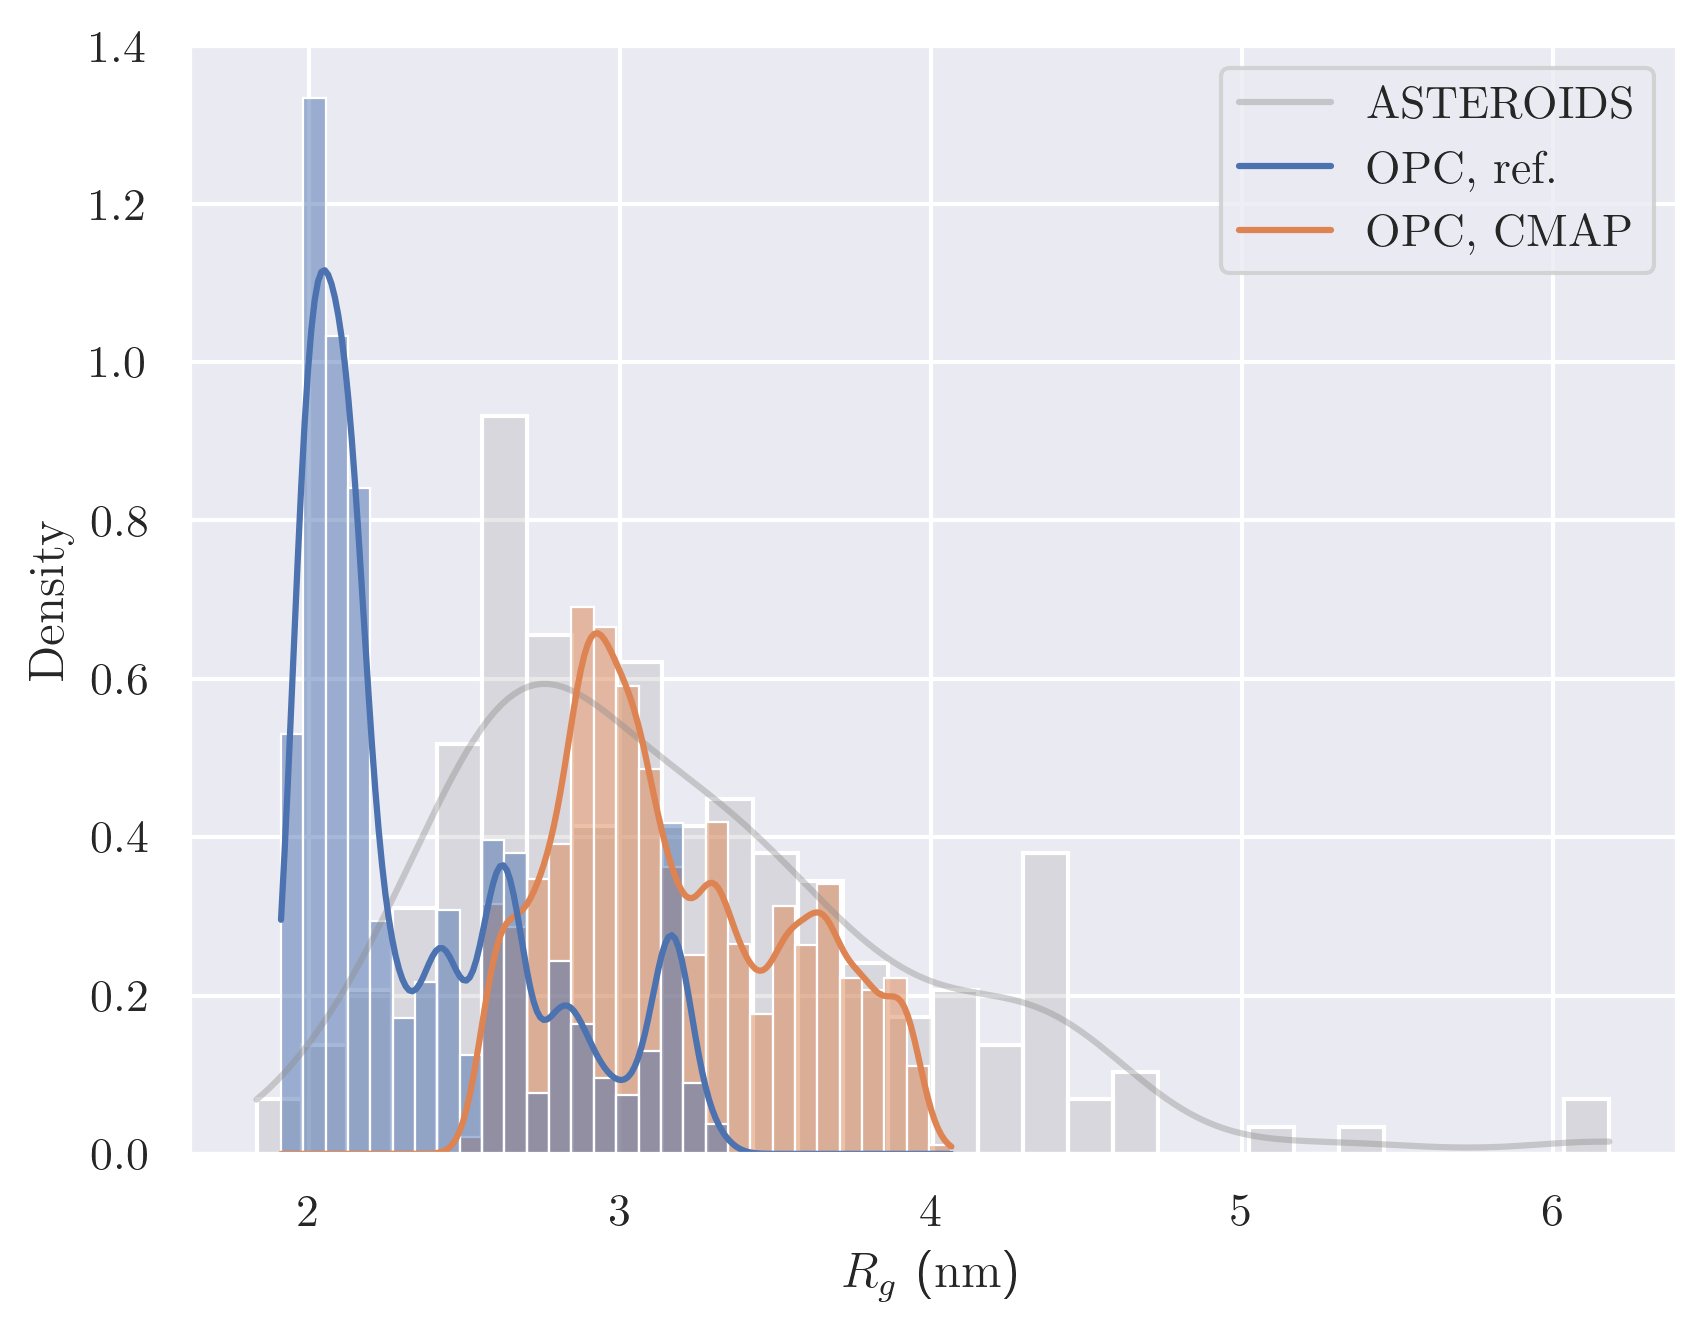

In [53]:
palette = sns.color_palette()

plot = sns.histplot(
    ens_rgs,
    kde=True,
    stat="density",
    color=palette[-3],
    bins=30,
    line_kws=dict(alpha=0.4),
    alpha=0.2,
)

plot = sns.histplot(
    [ref_sim_rg, cmap_sim_rg],
    kde=True,
    stat="density",
    bins=30,
    kde_kws=dict(bw_adjust=2.0),
    legend=False,
)

plt.xlabel(r"$R_g$ (\unit{\nm})")
plt.ylabel(r"\textrm{Density}")

handles = plt.gca().lines
labels = [
    r"\textrm{ASTEROIDS}",
    r"\textrm{OPC, CMAP}",
    r"\textrm{OPC, ref.}",
]
order = [0, 2, 1]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

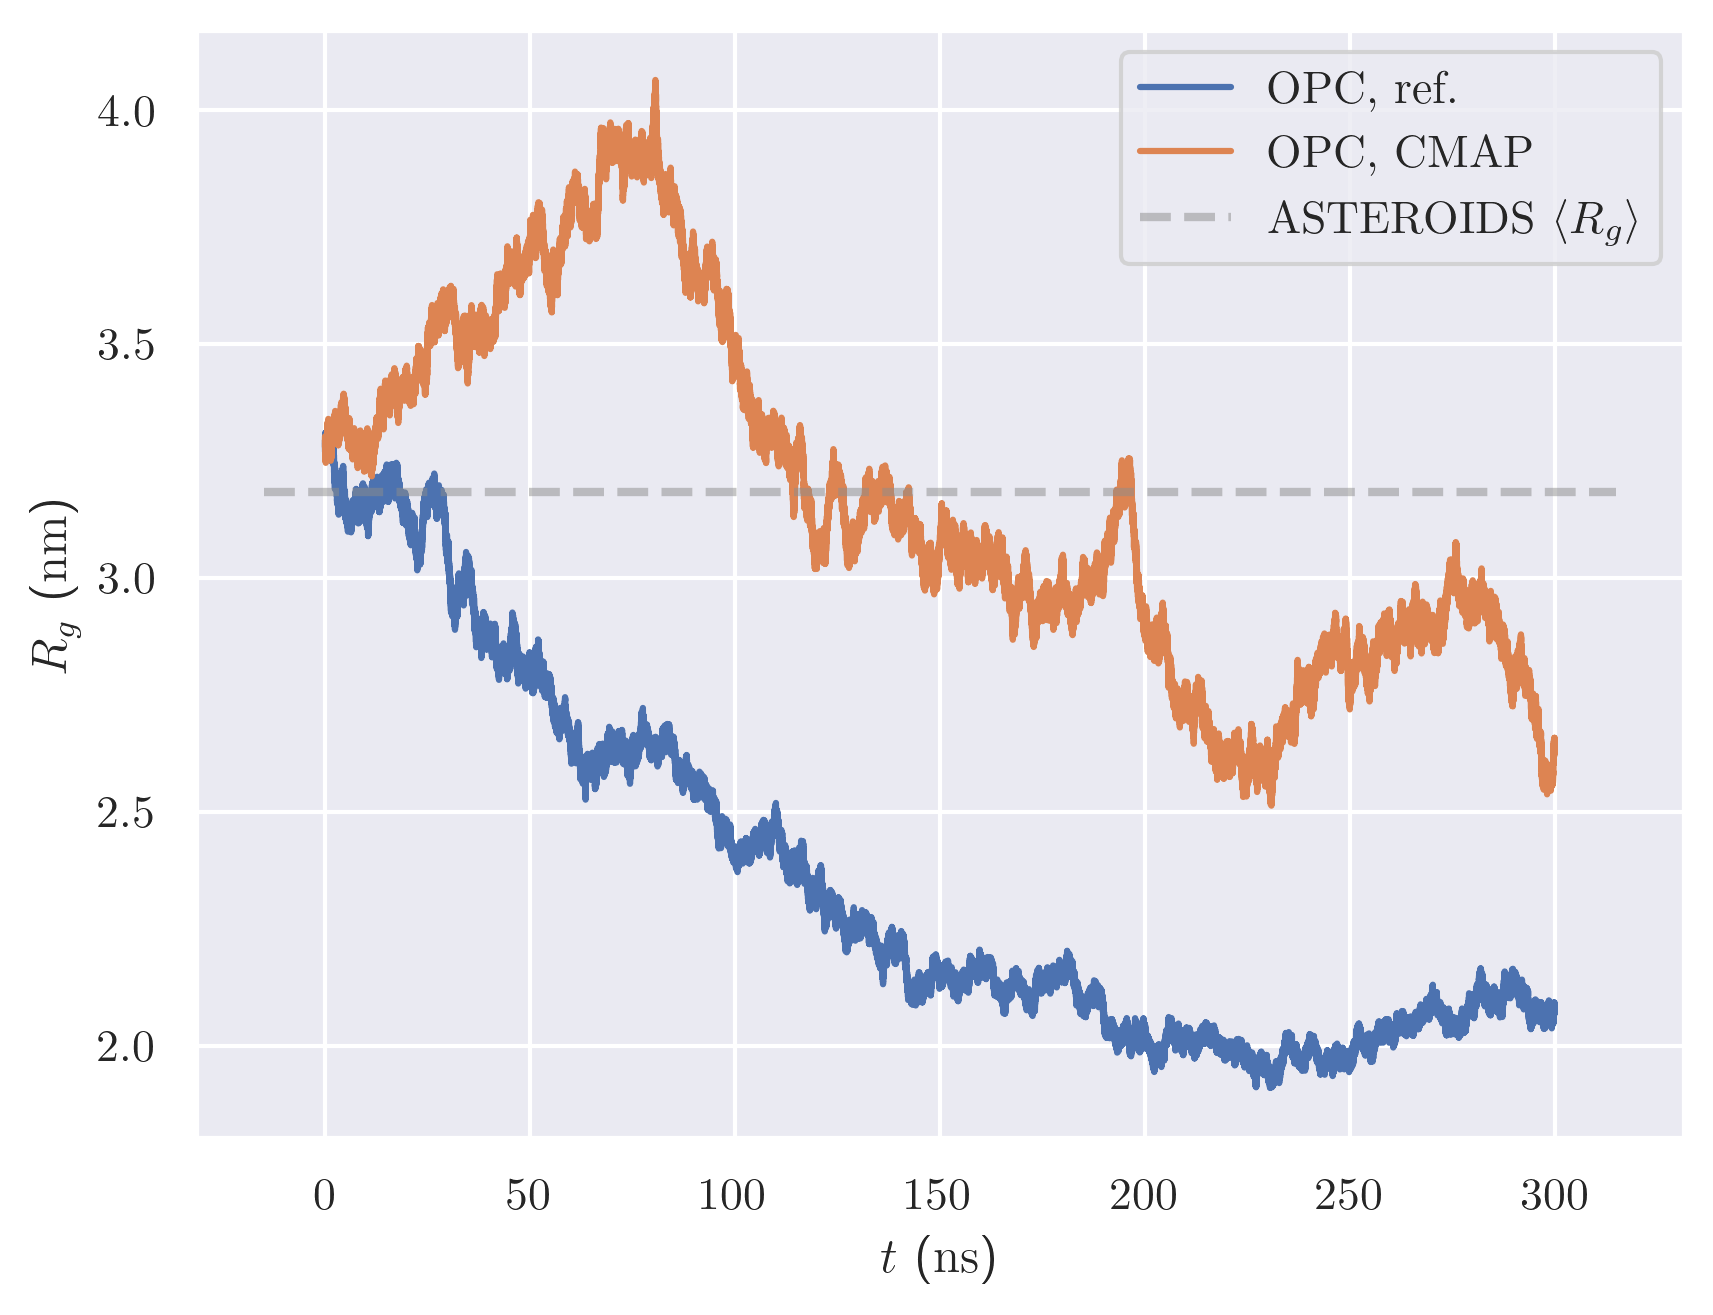

In [58]:
plt.plot(t_ref, ref_sim_rg, label= r"\textrm{OPC, ref.}")
plt.plot(t_cmap, cmap_sim_rg, label= r"\textrm{OPC, CMAP}")
plt.ylabel(r"$R_g$ (\unit{\nm})")
plt.xlabel(r"$t$ (\unit{\ns})")

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ax.hlines(y=ens_rgs.mean(), xmin=xmin, xmax=xmax, colors=palette[-3], ls='--', lw=2, alpha=0.5, label=r"\textrm{ASTEROIDS $\left\langle R_g \right\rangle$}")

plt.legend()


## All-atom OPC, multiple trajectories

In [4]:
from parse import parse


def compute_rg_df(basedir):
    basedir = Path(basedir)

    xtcs = list(basedir.glob("*a_132/md_nojump.xtc"))
    pdbs = [xtc.with_suffix(".pdb") for xtc in xtcs]

    dfs = []

    for pdb, xtc in zip(pdbs, xtcs):
        conformer = parse("{:d}a_132", pdb.parent.name)[0]
        print(conformer)

        df = gmx_gyrate(xtc, pdb)[["Rg"]]
        df["conformer"] = conformer

        dfs.append(df)

    df = pd.concat(dfs)
    df = df.set_index("conformer", append=True)

    return df


ref_rg_df = compute_rg_df("/home/gzappavigna/traj/20241018_ff99sb-ildn_opc_multidir")
cmap_rg_df = compute_rg_df("/home/gzappavigna/traj/20241025_ff99sb-ildn_opc_cmap_multidir/")


3097
6811
4622
7057
13589
11199
14470
10440
14017
8104
15062
9802
13573
10717
1528
19517
9380
7982
9613
9510
12724
5970
7169
17425
11038
6591
4618
1120
14037
836
6125
13939
17396
11561
1313
10072
3125
5033
7576
1911
15070
3359
12973
14122
8523
3069
15809
6734
6235
5813
15996
11591
16074
11618
4070
1386
812
2504
9056
2292
12877
10498
5188
16179
724
7054
13162
16527
12088
13889
3075
8041
13609
10099
16258
14744
2938
8508
4492
11972
7719
4425
290
1220
10216
2923
10777
1340
927
12237
1532
5731
6921
873
15776
7753
3097
6811
4622
7057
13589
11199
14470
10440
14017
8104
15062
9802
13573
10717
1528
19517
9380
7982
9613
9510
12724
5970
7169
17425
11038
6591
4618
1120
14037
836
6125
13939
17396
11561
1313
10072
3125
5033
7576
1911
15070
3359
12973
14122
8523
3069
15809
6734
6235
5813
15996
11591
16074
11618
4070
1386
812
2504
9056
2292
12877
10498
5188
16179
724
7054
13162
16527
12088
13889
3075
8041
13609
10099
16258
14744
2938
8508
4492
11972
7719
4425
290
1220
10216
2923
10777
1340
927
12237


In [6]:
ref_rg_df.index = ref_rg_df.index.set_levels(ref_rg_df.index.levels[0] / 1000, level=0)
cmap_rg_df.index = cmap_rg_df.index.set_levels(cmap_rg_df.index.levels[0] / 1000, level=0)

ref_rg_df.to_csv("ref_rg_df.csv")
cmap_rg_df.to_csv("cmap_rg_df.csv")

In [4]:
ref_rg_df = pd.read_csv("ref_rg_df.csv")
cmap_rg_df = pd.read_csv("cmap_rg_df.csv")

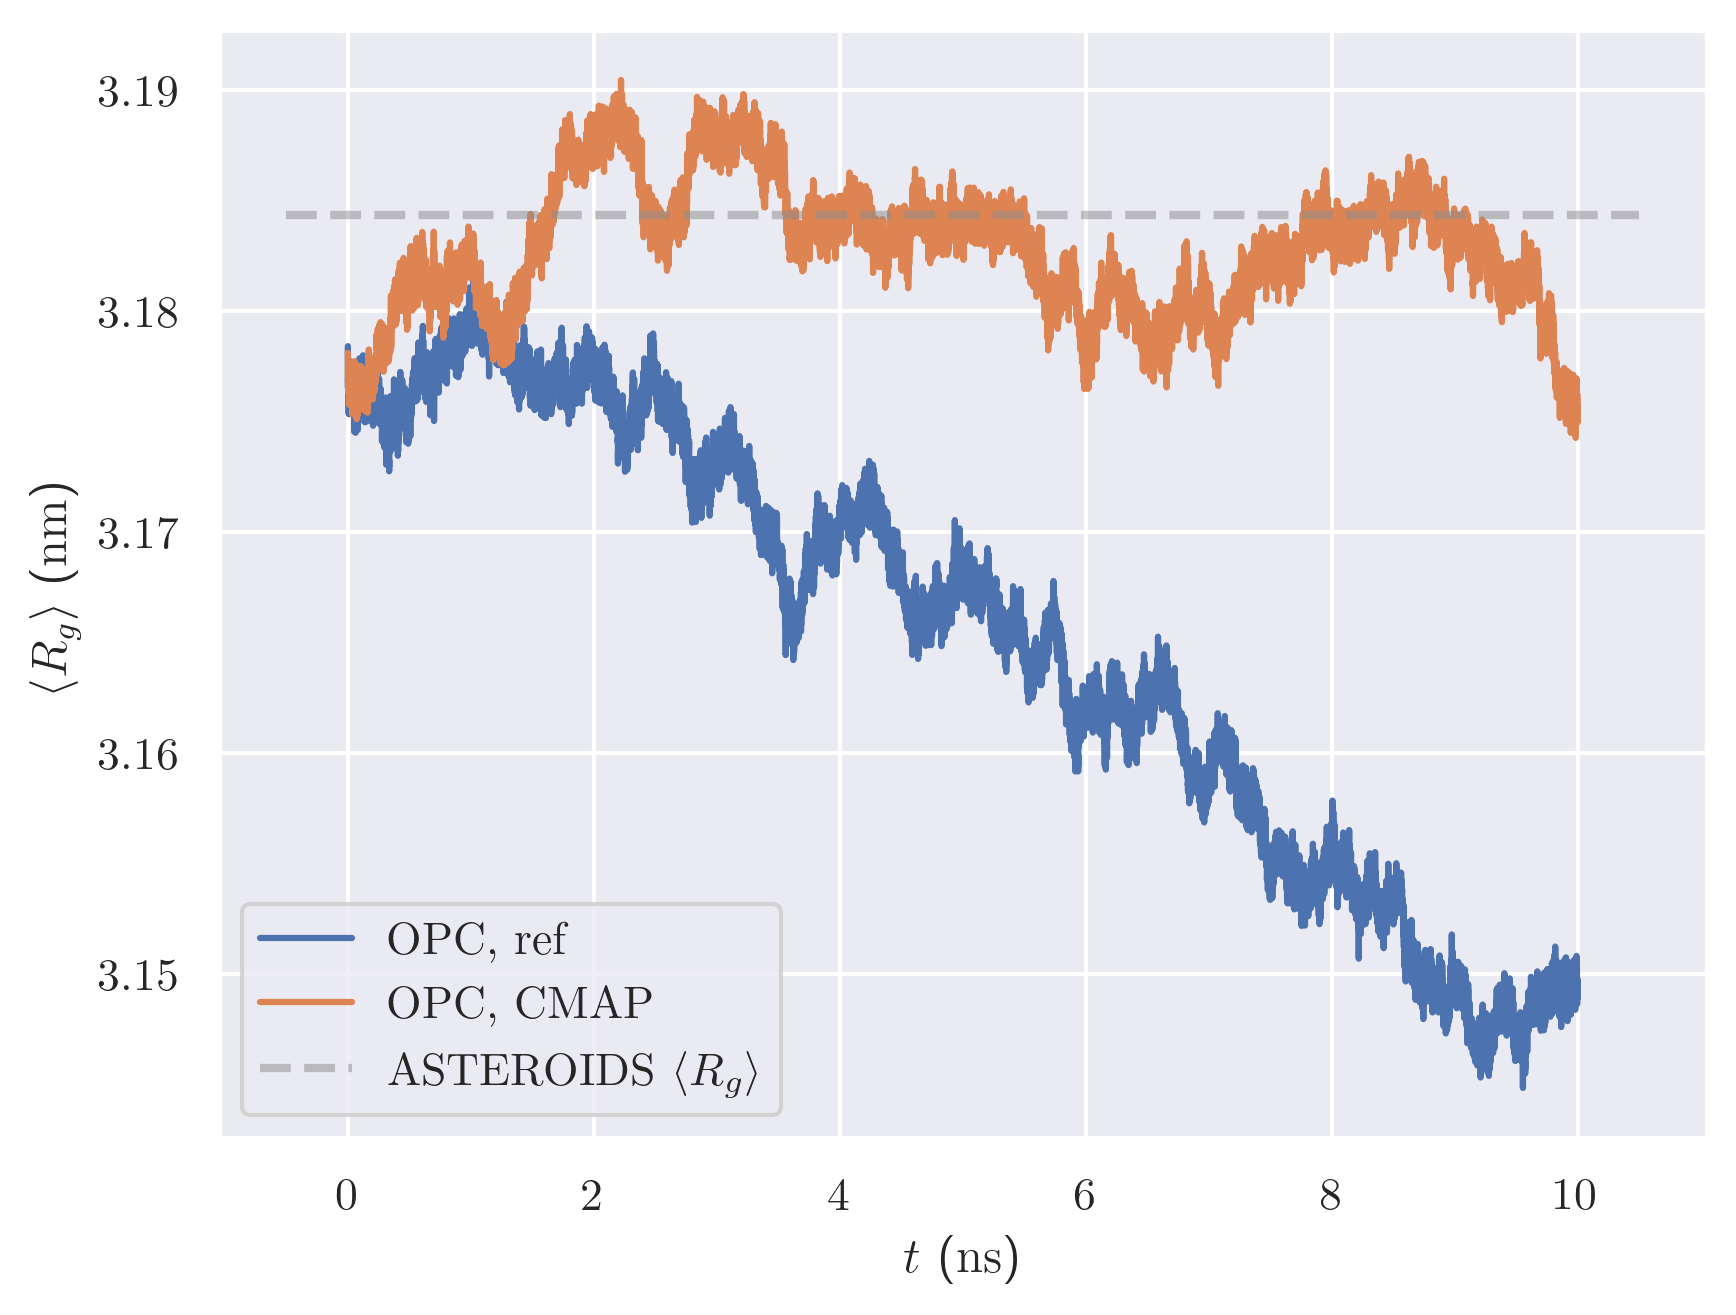

In [9]:
plt.plot(ref_rg_df.groupby("t")["Rg"].mean(), label=r"\textrm{OPC, ref}")
plt.plot(cmap_rg_df.groupby("t")["Rg"].mean(), label=r"\textrm{OPC, CMAP}")
plt.ylabel(r"$\left\langle R_g \right\rangle$ (\unit{\nm})")
plt.xlabel(r"$t$ (\unit{\ns})")

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ax.hlines(
    y=ens_rgs.mean(),
    xmin=xmin,
    xmax=xmax,
    colors=palette[-3],
    ls="--",
    lw=2,
    alpha=0.5,
    label=r"\textrm{ASTEROIDS $\left\langle R_g \right\rangle$}",
)

plt.legend()

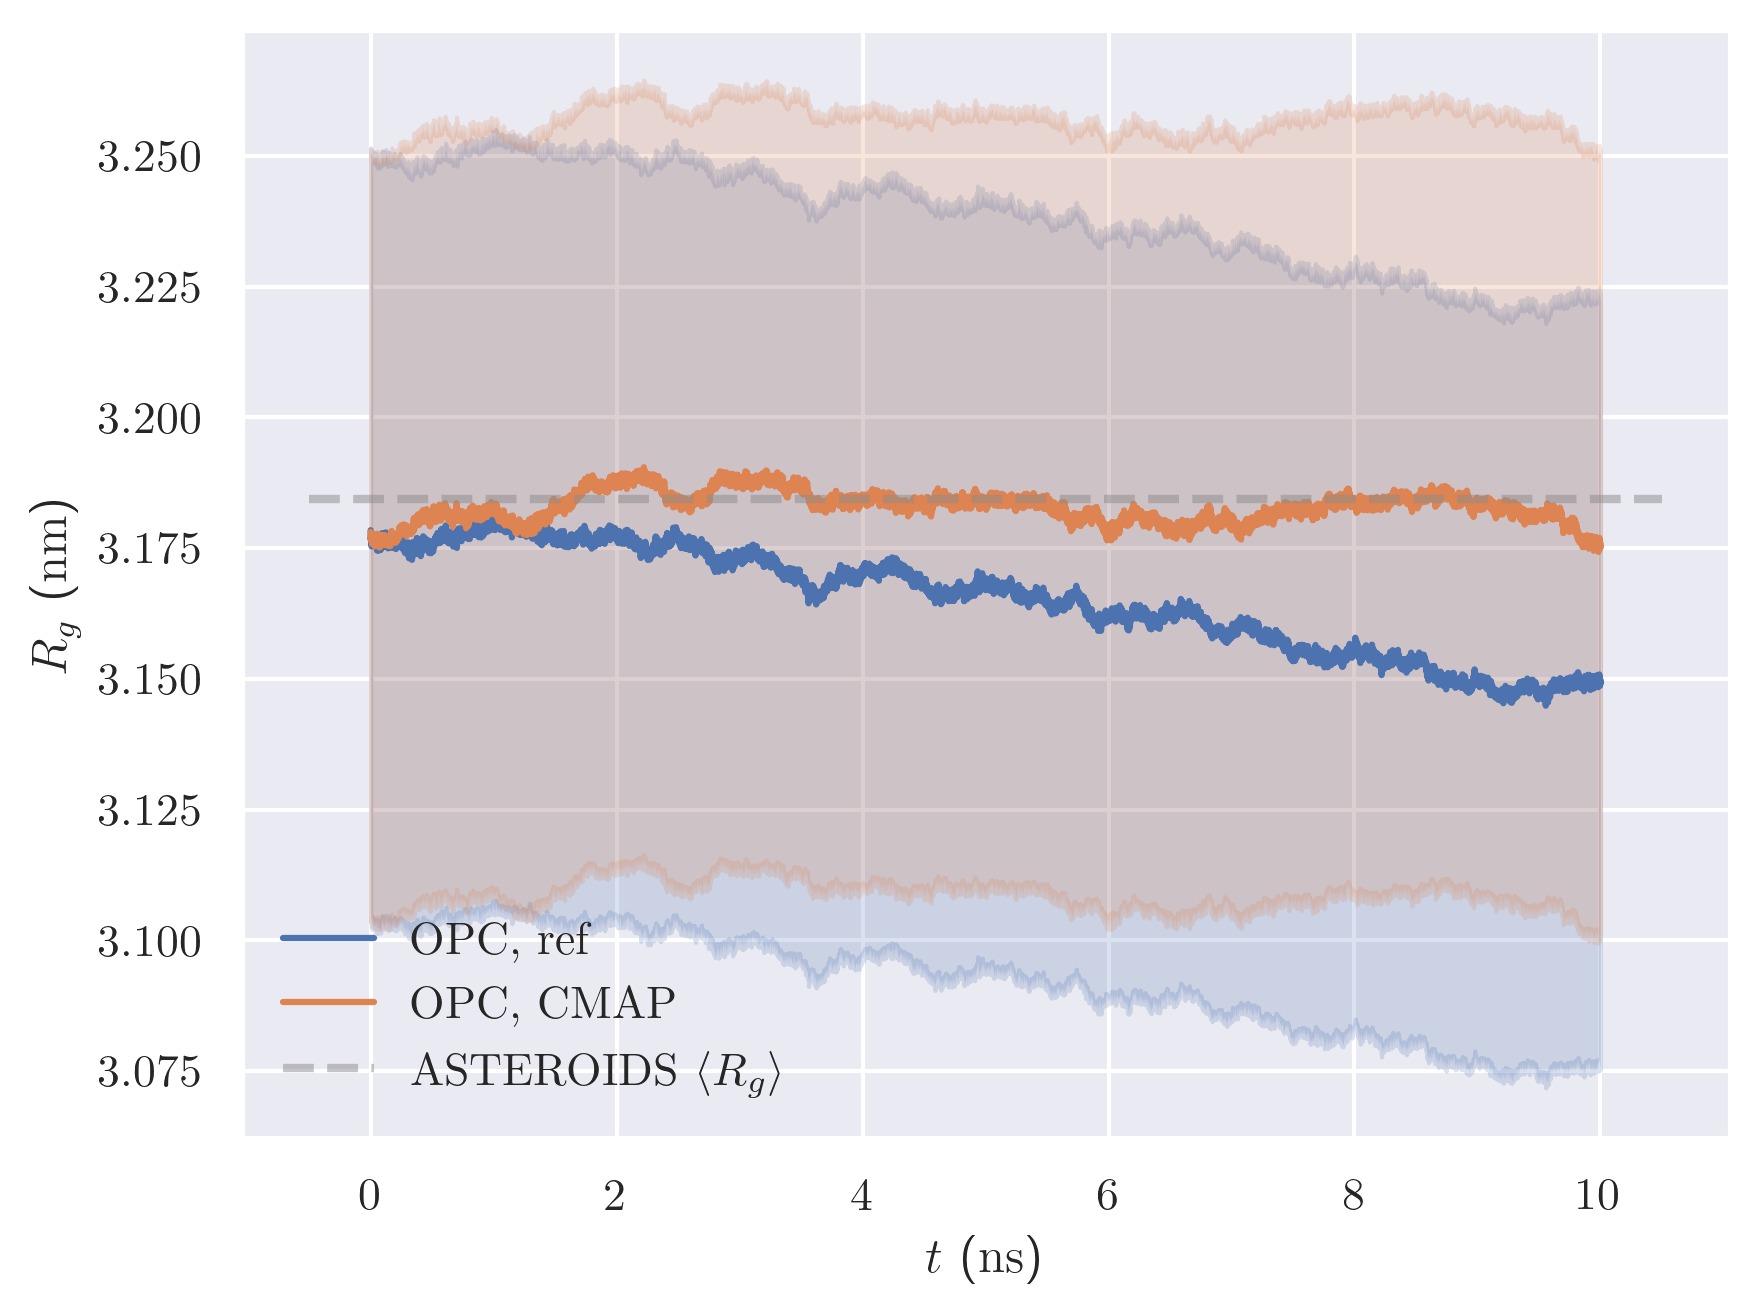

In [61]:
sns.lineplot(ref_rg_df, x="t", y="Rg", errorbar="se", label=r"\textrm{OPC, ref}")
sns.lineplot(cmap_rg_df, x="t", y="Rg", errorbar="se", label=r"\textrm{OPC, CMAP}")
plt.ylabel(r"$R_g$ (\unit{\nm})")
plt.xlabel(r"$t$ (\unit{\ns})")


ax = plt.gca()
xmin, xmax = ax.get_xlim()
ax.hlines(
    y=ens_rgs.mean(),
    xmin=xmin,
    xmax=xmax,
    colors=palette[-3],
    ls="--",
    lw=2,
    alpha=0.5,
    label=r"\textrm{ASTEROIDS $\left\langle R_g \right\rangle$}",
)

plt.legend(frameon=False)
